In [3]:
## Importando las librerías necesarias.

import numpy as np
import pandas as pd

from scipy import stats


In [4]:
from gapminder import gapminder

In [10]:
gapminder.select_dtypes(include = 'number').mean()
# Anteriormente, lanzaba un error, producto de la contención de valiables que no son numéricas.
# Por lo que se tuvieron que seleccionar solo las columnas numéricas.

year         1.979500e+03
lifeExp      5.947444e+01
pop          2.960121e+07
gdpPercap    7.215327e+03
dtype: float64

In [12]:
# Leyendo los datos.
Aplicando formato al los valores para incluir números con solamente dos decimales.
gapminder.select_dtypes(include = 'number').mean().round(2)

year             1979.50
lifeExp            59.47
pop          29601212.32
gdpPercap        7215.33
dtype: float64

**Mediana**

**Explicándole cuantos decimales quiero para mis valores numéricos**

In [14]:
gapminder.select_dtypes(include = 'number').median().round(1)

year            1979.5
lifeExp           60.7
pop          7023595.5
gdpPercap       3531.8
dtype: float64

**Moda**

In [16]:
gapminder.mode().round(1)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Africa,1952.0,69.4,60011,241.2
1,Albania,NaN,1957.0,NaN,61325,277.6
2,Algeria,NaN,1962.0,NaN,63149,298.8
3,Angola,NaN,1967.0,NaN,65345,299.9
4,Argentina,NaN,1972.0,NaN,70787,312.2
...,...,...,...,...,...,...
1699,NaN,NaN,NaN,NaN,1110396331,80894.9
1700,NaN,NaN,NaN,NaN,1164970000,95458.1
1701,NaN,NaN,NaN,NaN,1230075000,108382.4
1702,NaN,NaN,NaN,NaN,1280400000,109347.9


****Medidas de tendencia central avanzadas****

In [23]:
def medidas_avanzadas(gapminder, pop):
    """
    Calcula medidas estadísticas avanzadas para una columna específica
    """
    # Medidas básicas
    datos = gapminder[pop].dropna()
    media = datos.mean()
    desviacion_std = datos.std()
    
    # Coeficiente de variación (en porcentaje)
    coef_variacion = (desviacion_std / media) * 100 if media != 0 else np.nan
    
    # Curtosis
    curtosis = datos.kurtosis()
    
    # Deciles
    deciles = datos.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
    
    # Cuartiles
    cuartiles = datos.quantile([0.25, 0.5, 0.75])
    
    # Crear diccionario de resultados
    resultados = {
        'Media': media,
        'Desviación Estándar': desviacion_std,
        'Coeficiente de Variación (%)': coef_variacion,
        'Curtosis': curtosis,
        'Mínimo': datos.min(),
        'Máximo': datos.max(),
        'Count': datos.count()
    }
    
    # Agregar deciles
    for i in range(1, 10):
        resultados[f'Decil {i}'] = deciles.get(i/10, np.nan)
    
    # Agregar cuartiles
    resultados['Q1 (25%)'] = cuartiles.get(0.25, np.nan)
    resultados['Q2 (Mediana)'] = cuartiles.get(0.5, np.nan)
    resultados['Q3 (75%)'] = cuartiles.get(0.75, np.nan)
    
    return pd.DataFrame(list(resultados.items()), columns=['Medida', 'Valor'])

# Usar la función
resultados = medidas_avanzadas(gapminder, 'lifeExp')
resultados

,Medida,Valor
0,Media,59.474439
1,Desviación Estándar,12.917107
2,Coeficiente de Variación (%),21.718754
3,Curtosis,-1.126685
4,Mínimo,23.599000
5,Máximo,82.603000
6,Count,1704.000000
7,Decil 1,41.510800
8,Decil 2,45.899200
9,Decil 3,50.602096


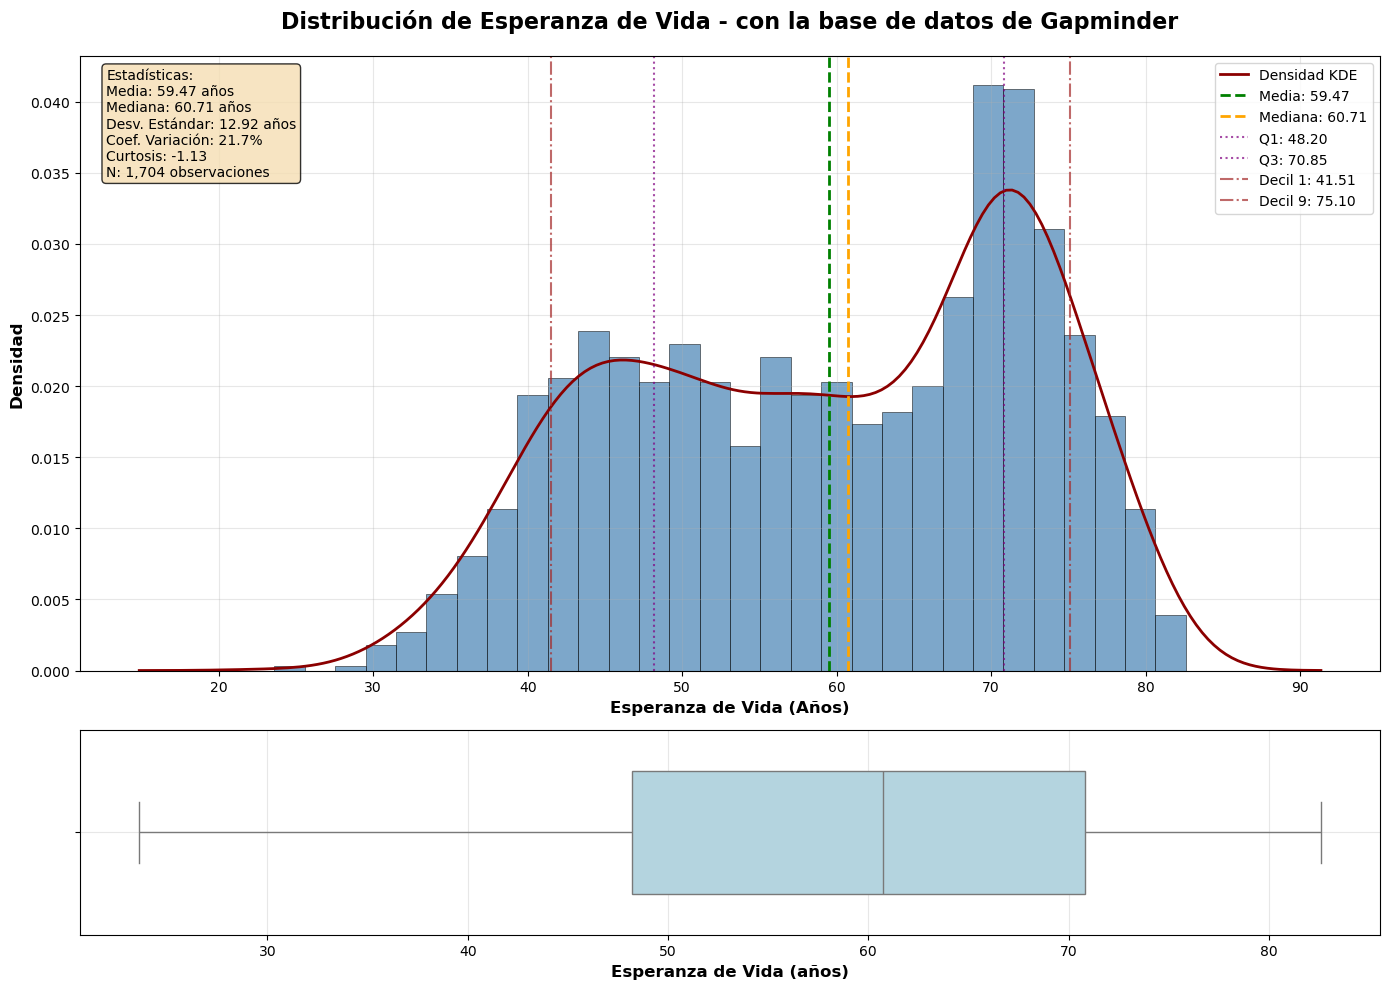

Tabla de Medidas Estadísticas:


,Medida,Valor
0,Media,59.474439
1,Mediana,60.712500
2,Desviación Estándar,12.917107
3,Coeficiente de Variación (%),21.718754
4,Curtosis,-1.126685
5,Mínimo,23.599000
6,Máximo,82.603000
7,Q1 (25%),48.198000
8,Q3 (75%),70.845500
9,Decil 1,41.510800


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Calcular las medidas estadísticas primero
base = gapminder['lifeExp'].dropna()
media = base.mean()
mediana = base.median()
std = base.std()
coef_var = (std / media) * 100
curtosis = base.kurtosis()
q1 = base.quantile(0.25)
q3 = base.quantile(0.75)
decil_1 = base.quantile(0.1)
decil_9 = base.quantile(0.9)

# Configuración estilo profesional
plt.style.use('default')
sns.set_palette("husl")

# Crear figura con subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), 
                              gridspec_kw={'height_ratios': [3, 1]})

# Histograma principal
n, bins, patches = ax1.hist(base, bins=30, alpha=0.7, color='steelblue', 
                           edgecolor='black', linewidth=0.5, density=True)

# Añadir línea de densidad KDE
sns.kdeplot(base, ax=ax1, color='darkred', linewidth=2, label='Densidad KDE')

# Añadir líneas de medidas de tendencia central (CORRECCIÓN: usar axvline en lugar de axoline)
ax1.axvline(media, color='green', linestyle='--', linewidth=2, 
           label=f'Media: {media:.2f}')
ax1.axvline(mediana, color='orange', linestyle='--', linewidth=2, 
           label=f'Mediana: {mediana:.2f}')

# Añadir líneas de cuartiles
ax1.axvline(q1, color='purple', linestyle=':', linewidth=1.5, alpha=0.7, 
           label=f'Q1: {q1:.2f}')
ax1.axvline(q3, color='purple', linestyle=':', linewidth=1.5, alpha=0.7, 
           label=f'Q3: {q3:.2f}')

# Añadir líneas de deciles 1 y 9
ax1.axvline(decil_1, color='brown', linestyle='-.', linewidth=1.5, alpha=0.7, 
           label=f'Decil 1: {decil_1:.2f}')
ax1.axvline(decil_9, color='brown', linestyle='-.', linewidth=1.5, alpha=0.7, 
           label=f'Decil 9: {decil_9:.2f}')

# Personalizar el histograma principal
ax1.set_title('Distribución de Esperanza de Vida - con la base de datos de Gapminder', 
             fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Esperanza de Vida (Años)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Densidad', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right', fontsize=10)

# Añadir boxplot en la parte inferior
sns.boxplot(x=base, ax=ax2, color='lightblue', width=0.6)
ax2.set_xlabel('Esperanza de Vida (años)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Añadir texto con estadísticas en el gráfico
stats_text = f'''Estadísticas:
Media: {media:.2f} años
Mediana: {mediana:.2f} años
Desv. Estándar: {std:.2f} años
Coef. Variación: {coef_var:.1f}%
Curtosis: {curtosis:.2f}
N: {len(datos):,} observaciones'''

ax1.text(0.02, 0.98, stats_text, transform=ax1.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Ajustar layout
plt.tight_layout()
plt.show()

# Mostrar también la tabla de medidas
def medidas_avanzadas(base, lifeExp):
    """Función para mostrar medidas estadísticas"""
    resultados = {
        'Media': media,
        'Mediana': mediana,
        'Desviación Estándar': std,
        'Coeficiente de Variación (%)': coef_var,
        'Curtosis': curtosis,
        'Mínimo': datos.min(),
        'Máximo': datos.max(),
        'Q1 (25%)': q1,
        'Q3 (75%)': q3,
        'Decil 1': decil_1,
        'Decil 9': decil_9,
        'Count': len(base)
    }
    
    return pd.DataFrame(list(resultados.items()), columns=['Medida', 'Valor'])

# Mostrar tabla
print("Tabla de Medidas Estadísticas:")
display(medidas_avanzadas(base, 'lifeExp'))